 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline


Bad key savefig.frameon in file C:\Users\12152\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\12152\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\12152\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probab

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
#Read in the whale returns to a new dataframe with the date as the index, and then sort the index in ascending order

whale_path = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.sort_index(inplace=True)

In [3]:
# Count nulls

whale_df.info()
whale_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1060 entries, 2015-03-02 to 2019-05-01
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1059 non-null   float64
 1   PAULSON & CO.INC.            1059 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1059 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1059 non-null   float64
dtypes: float64(4)
memory usage: 41.4 KB


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls

whale_df = whale_df.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns

algo_path = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.sort_index(inplace=True)

In [6]:
# Count nulls

algo_df.info()
algo_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1241 entries, 2014-05-28 to 2019-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Algo 1  1241 non-null   float64
 1   Algo 2  1235 non-null   float64
dtypes: float64(2)
memory usage: 29.1 KB


Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls

algo_df = algo_df.dropna()

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices

sp500_prices_path = Path("Resources/sp500_history.csv")
sp500_prices_df = pd.read_csv(sp500_prices_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_prices_df.sort_index(inplace=True)

In [9]:
# Check Data Types

sp500_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2012-10-01 to 2019-04-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


In [10]:
#Remove the dollar signs from the closing prices column (warning message is for future Pandas update, but the code still executes as required here)
sp500_prices_df["Close"] = sp500_prices_df["Close"].str.replace("$","")

C:\Users\12152\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


In [11]:
#Convert the data type for the closing prices to float
sp500_prices_df["Close"] = sp500_prices_df["Close"].astype(float)

In [12]:
#Calculate the S&P 500 daily returns and save in a new dataframe
sp500_returns_df = sp500_prices_df.pct_change()

In [13]:
#Drop the null values in the S&P 500 returns dataframe and save over the dataframe
sp500_returns_df = sp500_returns_df.dropna()

In [14]:
# Rename the "Close" column since it is now the calculated daily return
sp500_returns_df = sp500_returns_df.rename(columns={"Close":"S&P 500"})

## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
#Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single dataframe with columns for each portfolio's returns.
combined_returns = pd.concat([whale_df, algo_df, sp500_returns_df], axis="columns", join="inner")

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Portfolio Returns'}, xlabel='Date', ylabel='Daily Return'>

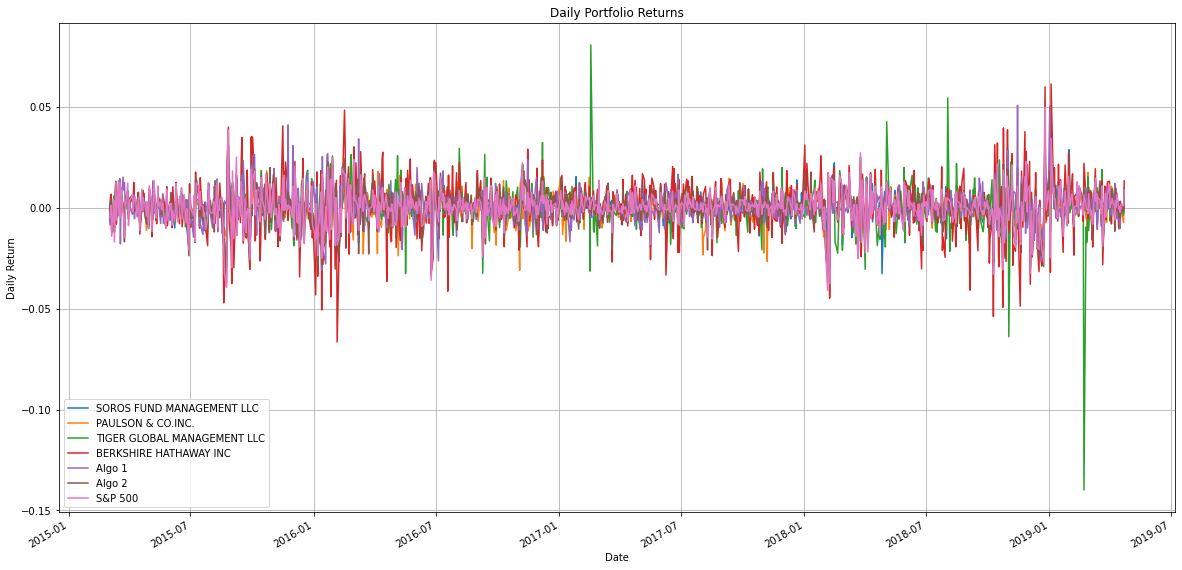

In [16]:
#Plot the daily returns for each portfolio on a combined plot
combined_returns.plot(title = "Daily Portfolio Returns", figsize = (20,10), ylabel="Daily Return", grid=True)

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Portfolio Returns'}, xlabel='Date', ylabel='Cumulative Return'>

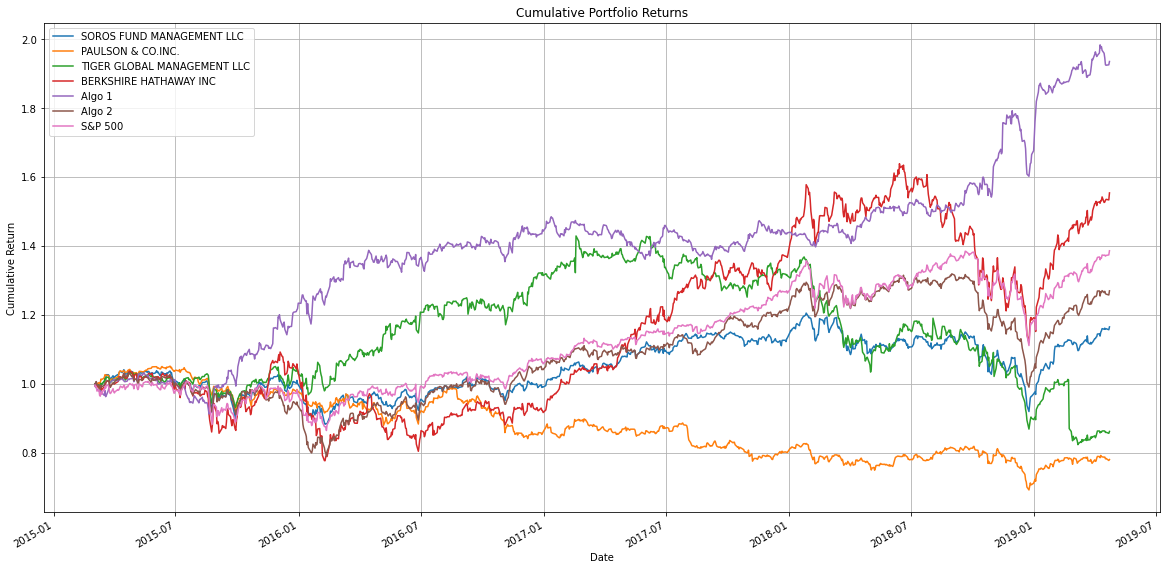

In [17]:
#Calculate the cumulative returns of each portfolio
combined_cumulative_returns = (1 + combined_returns).cumprod()

#Plot the cumulative returns for each portfolio on a combined plot
combined_cumulative_returns.plot(title = "Cumulative Portfolio Returns", figsize = (20,10), ylabel="Cumulative Return", grid=True)

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Daily Portfolio Returns'}, ylabel='Daily Return'>

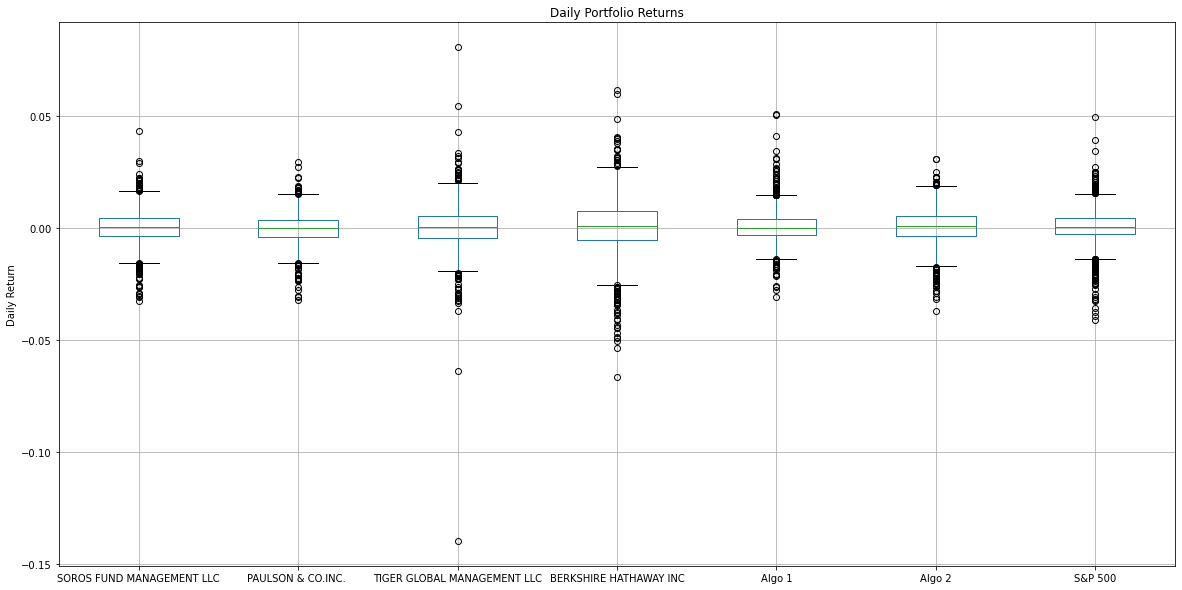

In [20]:
#Create a box plot for each portfolio to visually show risk
combined_returns.plot.box(title = "Daily Portfolio Returns", figsize = (20,10), ylabel="Daily Return", grid=True)

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios

#Calculate the daily standard deviation for all portfolios and the S&P 500
soros_daily_std = combined_returns["SOROS FUND MANAGEMENT LLC"].std()
paulson_daily_std = combined_returns["PAULSON & CO.INC. "].std()
tiger_daily_std = combined_returns["TIGER GLOBAL MANAGEMENT LLC"].std()
berkshire_daily_std = combined_returns["BERKSHIRE HATHAWAY INC"].std()
algo1_daily_std = combined_returns["Algo 1"].std()
algo2_daily_std = combined_returns["Algo 2"].std()

combined_returns_std = {
    "SOROS FUND MANAGEMENT LLC" : soros_daily_std,
    "PAULSON & CO.INC." : paulson_daily_std,
    "TIGER GLOBAL MANAGEMENT LLC" : tiger_daily_std,
    "BERKSHIRE HATHAWAY INC" : berkshire_daily_std,
    "Algo 1" : algo1_daily_std,
    "Algo 1" : algo2_daily_std
}

### Determine which portfolios are riskier than the S&P 500

In [22]:

#Calculate the daily standard deviation of the S&P 500
sp500_daily_std = combined_returns["S&P 500"].std()

# Determine which portfolios are riskier than the S&P 500

for returns in combined_returns_std:
    if sp500_daily_std < combined_returns_std[returns]:
        print(f"{returns} is riskier than the S&P 500")

TIGER GLOBAL MANAGEMENT LLC is riskier than the S&P 500
BERKSHIRE HATHAWAY INC is riskier than the S&P 500


### Calculate the Annualized Standard Deviation

In [24]:
#Calculate the annualized standard deviation (252 trading days) for all portfolios and the S&P 500
combined_returns_annual_std = combined_returns.std() * np.sqrt(252)
combined_returns_annual_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [25]:
#Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
combined_returns.rolling(window=21).std().plot(title = "Rolling 21-Day Standard Deviation of Portfolio Returns", figsize = (20,10), ylabel="Rolling 21-Day Standard Deviation", 

SyntaxError: unexpected EOF while parsing (<ipython-input-25-6d72945b0b07>, line 2)

### Calculate and plot the correlation

In [26]:
#Calculate the correlation between the portfolios and S&P 500
portfolios_correlation = combined_returns.corr()

#Display the correlations in a correlations matrix (i.e., heat map)
sns.heatmap(portfolios_correlation, vmin=-1, vmax=1)

NameError: name 'sns' is not defined

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Soros Fund Management LLC Beta Trend'}, xlabel='Date', ylabel='Rolling 60-Day Beta'>

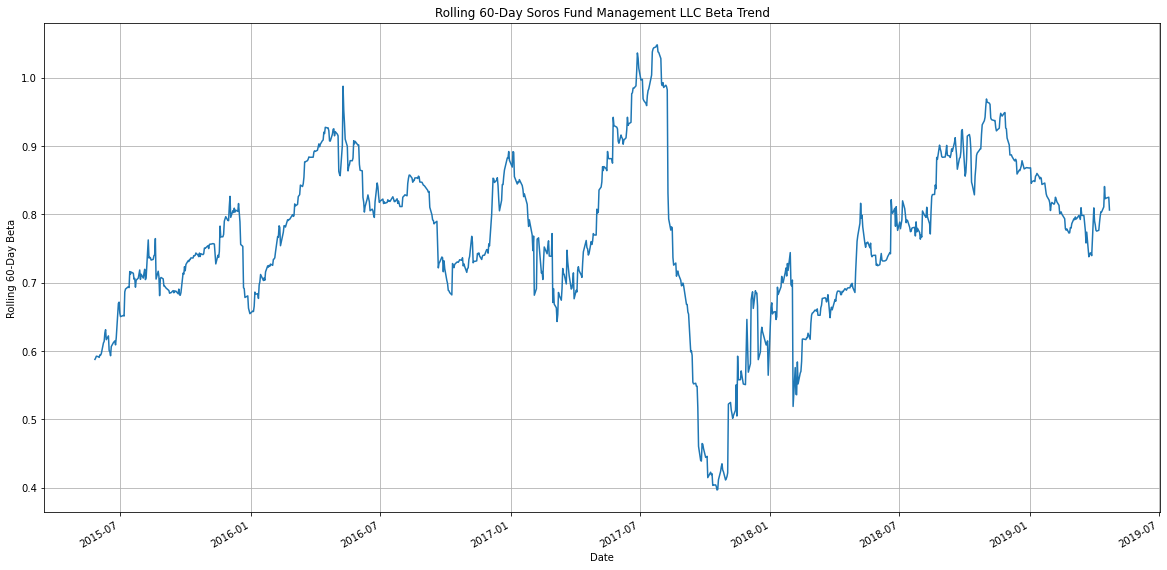

In [27]:
#Here, Soros Fund Management LLC was chosen for the 60-day rolling beta calculations and plotting since it may mimic the S&P 500 based on the correlation/heat map.
#Calculate the 60-day rolling covariance of Soros Fund Management LLC and the S&P 500
soros_rolling_covariance = combined_returns["SOROS FUND MANAGEMENT LLC"].rolling(window=60).cov(combined_returns["S&P 500"])

#Calculate the 60-day rolling variance of the S&P 500
sp500_rolling_variance = combined_returns["S&P 500"].rolling(window=60).var()

#Compute the 60-day rolling beta for the Soros Fund Management LLC
soros_rolling_beta = soros_rolling_covariance / sp500_rolling_variance

#Plot the 60-day rolling beta for Soros Fund Management LLC
soros_rolling_beta.plot(title = "Rolling 60-Day Soros Fund Management LLC Beta Trend", figsize = (20,10), ylabel="Rolling 60-Day Beta", grid=True)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [28]:
#Use `ewm` to calculate the exponentially weighted rolling beta (similar steps as the previous calculations) for Soros Fund Management LLC using a 21-day half life
soros_ewm_covariance = combined_returns["SOROS FUND MANAGEMENT LLC"].ewm(halflife=21).cov(combined_returns["S&P 500"])

sp500_ewm_variance = combined_returns['S&P 500'].ewm(halflife=21).var()

soros_ewm_beta = soros_ewm_covariance / sp500_ewm_variance

#Plot the exponentially weighted rolling beta for Soros Fund Management LLC
soros_ewm_beta.plot(title = "Rolling 60-Day Soros Fund Management LLC Beta Trend", figsize = (20,10), ylabel="Rolling 60-Day Beta", ylim=(0.3,1.2),grid=

SyntaxError: unexpected EOF while parsing (<ipython-input-28-3b16e15870cf>, line 9)

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [29]:
#Calculate the annualized Sharpe Ratios
#Assume the risk free rate is zero which is sufficient since this will be assumed in the calcualtion for all portfolios and the S&P 500 for comparison
portfolio_sharpe_ratios = combined_returns.mean() / (combined_returns.std()*np.sqrt(252))
portfolio_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.001414
PAULSON & CO.INC.             -0.001919
TIGER GLOBAL MANAGEMENT LLC   -0.000480
BERKSHIRE HATHAWAY INC         0.002468
Algo 1                         0.005471
Algo 2                         0.001990
S&P 500                        0.002572
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}, ylabel='Annualized Sharpe Ratio'>

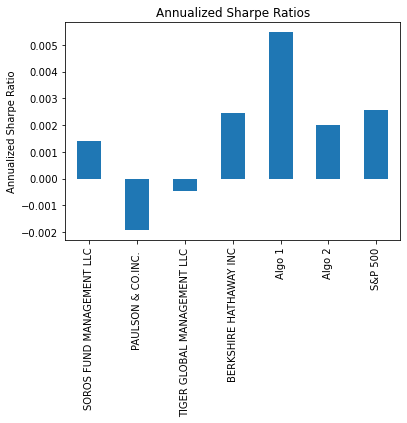

In [30]:
#Plot the annualized Sharpe Ratios as a bar plot to visualize them for analysis
portfolio_sharpe_ratios.plot(kind="bar", title="Annualized Sharpe Ratios", ylabel="Annualized Sharpe Ratio")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [ ]:
Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.
Algo 1 outperforms all portfolios

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [32]:
# Get stock data

google_csv = Path("goog_historical.csv")
google_historical = pd.read_csv(
    google_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
google_historical = google_historical.sort_index()
google_historical.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [33]:
# Reading data from 1st stock

apple_csv = Path("aapl_historical.csv")
apple_historical = pd.read_csv(
    apple_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
apple_historical = apple_historical.sort_index()
apple_historical.head()


,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [34]:
# Reading data from 2nd stock

apple_csv = Path("aapl_historical.csv")
apple_historical = pd.read_csv(
    apple_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
apple_historical = apple_historical.sort_index()
apple_historical.head()


,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [35]:
# Reading data from 3rd stock

costco_csv = Path("cost_historical.csv")
costco_historical = pd.read_csv(
    costco_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
costco_historical = costco_historical.sort_index()
costco_historical.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [36]:
# Combine all stocks in a single DataFrame
stock_data_concatenated = pd.concat([google_historical, apple_historical, costco_historical], axis="rows", join="inner")
stock_data_concatenated.head()


,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [37]:
# Reset Date index

stock_data_concatenated = stock_data_concatenated.reset_index()
stock_data_concatenated.head()


,Trade DATE,Symbol,NOCP
0,2018-05-11,GOOG,1098.26
1,2018-05-14,GOOG,1100.20
2,2018-05-15,GOOG,1079.23
3,2018-05-16,GOOG,1081.77
4,2018-05-17,GOOG,1078.59


In [38]:
# Reorganize portfolio data by having a column per symbol

reorganized_portfolio = stock_data_concatenated.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
reorganized_portfolio.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [39]:
# Calculate daily returns

daily_returns = reorganized_portfolio.pct_change()

# Drop NAs
daily_returns = daily_returns.dropna()

# Display sample data
daily_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [40]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = daily_returns.dot(weights)

# Display sample data
weighted_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [44]:
# Join your returns DataFrame to the original returns DataFrame

#Combine the custom portfolio returns with the data frame for the combined returns of the whales, algorithms, and S&P 500
comparison_returns_df = pd.concat([combined_returns, weighted_returns], axis="columns", join="inner")
comparison_returns_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,0
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


In [45]:
#Change the column title for the custom portfolio column since it is was brought in as an integer when it was combined into the dataframe
#First convert the columns into strings and then rename the last column for the custom portfolio
comparison_returns_df.columns = comparison_returns_df.columns.astype(str)
comparison_returns_df = comparison_returns_df.rename(columns={"0":"Custom Portfolio"})
comparison_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom Portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [47]:
#Calculate the annualized standard deviation (252 trading days) for all portfolios (now including the custom portfolio) and the S&P 500
comparison_returns_annual_std = comparison_returns_df.std() * np.sqrt(252)
comparison_returns_annual_std

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
Custom Portfolio               0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [51]:
#Calculate and plot the rolling standard deviation for all portfolios (now including the custom portfolio) using a 21-day window
comparison_returns_df.rolling(window=21).std().plot

### Calculate and plot the correlation

In [52]:
#Calculate the correlation between all the portfolios and S&P 500
portfolios_with_custom_correlation = comparison_returns_df.corr()

#Display the correlations in a correlations matrix (i.e., heat map)
sns.heatmap(portfolios_with_custom_correlation, vmin=-1, vmax=1)

NameError: name 'sns' is not defined

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Custom Portfolio Beta Trend'}, ylabel='Rolling 60-Day Beta'>

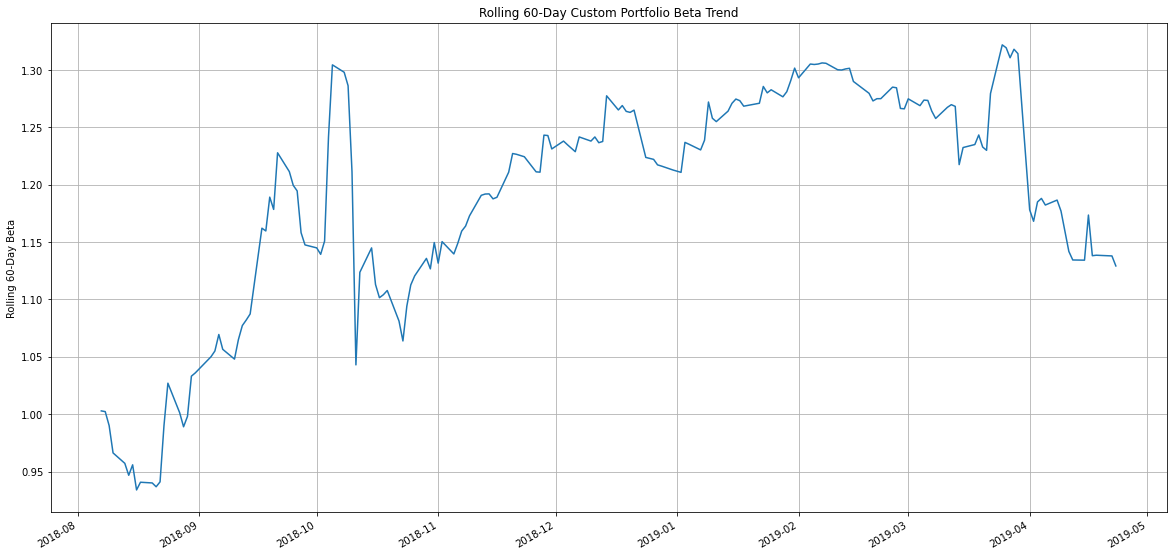

In [53]:
#Calculate the 60-day rolling covariance of the custom portfolio and the S&P 500
custom_covariance = comparison_returns_df["Custom Portfolio"].rolling(window=60).cov(comparison_returns_df["S&P 500"])

#Calculate the 60-day rolling variance of the S&P 500
sp500_updated_rolling_variance = comparison_returns_df["S&P 500"].rolling(window=60).var()

#Compute the 60-day rolling beta for the custom portfolio
custom_rolling_beta = custom_covariance / sp500_updated_rolling_variance

#Plot the 60-day rolling beta for the custom portfolio
custom_rolling_beta.plot(title = "Rolling 60-Day Custom Portfolio Beta Trend", figsize = (20,10), ylabel="Rolling 60-Day Beta", grid=True)

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [54]:
#Calculate the annualized Sharpe Ratios for all portfolios (now including the custom portfolio) and the S&P 500
#Assume the risk free rate is zero which is sufficient since this will be assumed in the calcualtion for all portfolios and the S&P 500 for comparison
updated_sharpe_ratios = comparison_returns_df.mean() / (comparison_returns_df.std()*np.sqrt(252))
updated_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.001709
PAULSON & CO.INC.              0.001027
TIGER GLOBAL MANAGEMENT LLC   -0.004104
BERKSHIRE HATHAWAY INC         0.000634
Algo 1                         0.008078
Algo 2                         0.000320
S&P 500                        0.002321
Custom Portfolio               0.003703
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}, ylabel='Annualized Sharpe Ratio'>

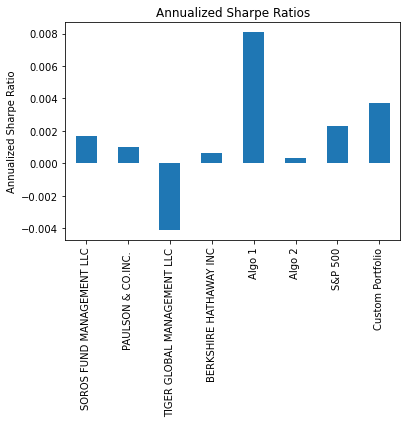

In [55]:
#Plot the annualized Sharpe Ratios as a bar plot to visualize them for analysis
updated_sharpe_ratios.plot(kind="bar", title="Annualized Sharpe Ratios", ylabel="Annualized Sharpe Ratio")

### How does your portfolio do?

Write your answer here!

In [ ]:
Per the standard deviation calculations, the custom portfolio is riskier than the S&P 500 and all other portfolios except for Berkshire Hathaway. The plot of the 60-day rolling beta for the custom portfolio reinforces that it is risky/more volatile as compared to the S&P 500 since its beta is greater than 1 for a majority of the time range of the data set. However, when taking into account the portfolio returns with this risk (i.e, the Sharpe Ratio), the custom portfolio shows the second highest Sharpe Ratio behind only Algorithm 1. Therefore, for the specified timeframe of the dataset, the custom portfolio generated higher returns on a risk-adjusted basis than all of the whale investors, the S&P 500, and Algorithm 2!